In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

# --Data-- 

In [2]:
import data

In [3]:
temp, dico = data.load_input_data('data/train_input.csv')

In [4]:
output = data.load_output_data('data/challenge_output.csv', temp, dico)

In [5]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

In [6]:
dico['building_12_10']

{'AC_WE_hours': [0.0, 8.25, 18.75, 24.0],
 'AC_WE_temperatures_degreC': [32.0, 27.56, 31.43, 31.43],
 'AC_monday_hours': [0.0, 5.0, 18.0, 24.0],
 'AC_monday_temperatures_degreC': [32.0, 24.55, 28.04, 28.04],
 'AC_power_kW': 603.58,
 'AC_week_hours': [0.0, 6.75, 19.5, 24.0],
 'AC_week_temperatures_degreC': [32.0, 24.6, 28.82, 28.82],
 'AHU_high_threshold': 22.0,
 'AHU_low_threshold': 18.0,
 'PCs_percent_on_night_WE': 0.2,
 'Phantom_use_kW': 192.89,
 'airchange_infiltration_m3perh': 0.18,
 'airchange_ventilation_m3perh': 0.79,
 'heating_WE_hours': [0.0, 7.5, 17.5, 24.0],
 'heating_WE_temperatures_degreC': [17.0, 20.9, 14.49, 14.49],
 'heating_monday_hours': [0.0, 5.0, 19.0, 24.0],
 'heating_monday_temperatures_degreC': [17.0, 20.5, 16.19, 16.19],
 'heating_power_kW': 180.09,
 'heating_week_hours': [0.0, 6.0, 18.0, 24.0],
 'heating_week_temperatures_degreC': [17.0, 22.62, 17.1, 17.1],
 'initial_temperature': 20.0,
 'light_percent_on_night_WE': 0.1,
 'lighting_Wperm2': 1.46,
 'nb_PCs': 368

# --Features--

In [7]:
f, keys = data.features(temp, dico['building_9_2'])

0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extraction
80.12820512820514% of feature extraction
91.57509157509158% of feature extraction
done


In [8]:
f.shape

(8736, 51)

In [9]:
keys

{0: 'outside_temp',
 1: 'day',
 2: 'hour',
 3: 'AC_on',
 4: 'AC_temp',
 5: 'heating_on',
 6: 'heating_temp',
 7: 'ventilation_on',
 8: 'thickness_intfloor_m',
 9: 'thickness_intfloor_m',
 10: 'thickness_intfloor_m',
 11: 'thickness_intfloor_m',
 12: 'window_percent_3_outwall',
 13: 'AHU_high_threshold',
 14: 'PCs_percent_on_night_WE',
 15: 'surface_4_m2_OUTW',
 16: 'surface_1_m2_OUTW',
 17: 'orientation',
 18: 'AHU_low_threshold',
 19: 'thickness_roof_m',
 20: 'thickness_roof_m',
 21: 'window_percent_1_outwall',
 22: 'heating_power_kW',
 23: 'window_percent_2_outwall',
 24: 'nb_PCs',
 25: 'initial_temperature',
 26: 'thickness_ground_m',
 27: 'thickness_ground_m',
 28: 'thickness_ground_m',
 29: 'thickness_ground_m',
 30: 'surface_2_m2_OUTW',
 31: 'thickness_outwall_m',
 32: 'thickness_outwall_m',
 33: 'thickness_outwall_m',
 34: 'airchange_ventilation_m3perh',
 35: 'surface_3_m2_OUTW',
 36: 'surface_m2_GROU',
 37: 'airchange_infiltration_m3perh',
 38: 'window_percent_4_outwall',
 39: 

In [10]:
r = output['building_9_2']

# --Models--

**--try neural net--**

In [12]:
from sklearn.neural_network import MLPRegressor

In [13]:
x_train = f[0:7000, :]
y_train = r[0:7000, 0]

x_test = f[7000:, :]
y_test = r[7000:, 0]

In [14]:
print(x_train.shape, y_train.shape)

(7000, 51) (7000,)


In [23]:
neural_net = MLPRegressor(hidden_layer_sizes=(500, 200), validation_fraction = 0.2, early_stopping = False,
                                   verbose = True, random_state = 777, learning_rate='constant',
                                   learning_rate_init=0.0001, tol=1e-6)

start = time.time()
neural_net.fit(x_train, y_train)
end = time.time()

print("Training time: " + str(end-start))

Iteration 1, loss = 7491.14268832
Iteration 2, loss = 190.19280505
Iteration 3, loss = 8.91681448
Iteration 4, loss = 4.24663302
Iteration 5, loss = 4.12114344
Iteration 6, loss = 4.17762713
Iteration 7, loss = 4.08159968
Iteration 8, loss = 3.99396727
Iteration 9, loss = 3.91745408
Iteration 10, loss = 3.84072928
Iteration 11, loss = 4.04763820
Iteration 12, loss = 3.73419054
Iteration 13, loss = 3.64127530
Iteration 14, loss = 3.63550600
Iteration 15, loss = 3.53646737
Iteration 16, loss = 3.47579513
Iteration 17, loss = 3.39467341
Iteration 18, loss = 3.27577036
Iteration 19, loss = 3.18439537
Iteration 20, loss = 3.09999721
Iteration 21, loss = 3.06310068
Iteration 22, loss = 2.89153547
Iteration 23, loss = 2.80274188
Iteration 24, loss = 2.80795436
Iteration 25, loss = 2.67855699
Iteration 26, loss = 2.69380879
Iteration 27, loss = 2.56437353
Iteration 28, loss = 2.53684107
Iteration 29, loss = 2.47462568
Iteration 30, loss = 2.52144030
Iteration 31, loss = 2.23451610
Iteration 32

In [24]:
y_hat = neural_net.predict(x_test)

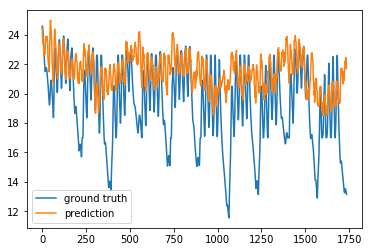

In [25]:
plt.figure()
plt.plot(y_test, label='ground truth')
plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

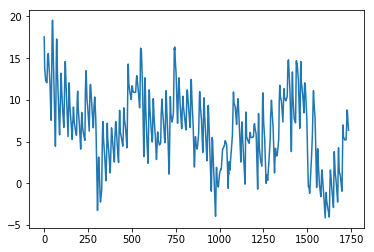

In [51]:
plt.figure()
plt.plot(x_test[:, 0])
plt.show()

**--HMM--**

In [7]:
import hmm

In [8]:
building_train = 'building_11_16'
building_test_1 = 'building_11_12'
building_test_2 = 'building_8_6'

In [9]:
x_train, _ = data.features(temp, dico[building_train])
x_test_1, _ = data.features(temp, dico[building_test_1])
x_test_2, _ = data.features(temp, dico[building_test_2])

0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extraction
80.12820512820514% of feature extraction
91.57509157509158% of feature extraction
done
0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extraction
80.12820512820514% of feature extraction
91.57509157509158% of feature extraction
done
0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extractio

In [10]:
def remove_low_var_variables(features, var_threshold):
    """
    """
    
    new_features = []
    L, N = features.shape
    
    for i in range(features.shape[1]):
        
        if(features[:, i].var() > var_threshold):
            
            new_features.append(list(features[:, i]))
    
    print('removed {} low-variance variables'.format(N - len(new_features)))
    return np.array(new_features).T

In [3]:
def preprocess(X):
    """
    returns centered and normalized data
    """
    
    n, d = X.shape
    
    for i in range(d):
        
        mu = np.mean(X[:, i])
        var = np.var(X[:, i])
        
        if var == 0:
            var = 1
        
        X[:, i] = (X[:, i] - mu) / np.sqrt(var)
        
    return X

In [12]:
def min_max_scaling(X):
    """
    returns data scaled in [0, 1]
    """
    
    n, d = X.shape
    
    for i in range(d):
        
        mi = min(X[:, i])
        ma = max(X[:, i])
        
        X[:, i] = (X[:, i] - mi) / (ma - mi) * 10
    
    return X

In [13]:
T = 300

In [14]:
x_train = x_train[0:T, :]
x_test_1 = x_test_1[0:T, :]
x_test_2 = x_test_2[0:T, :]

In [15]:
x_train = remove_low_var_variables(x_train, 0.2)
x_test_1 = remove_low_var_variables(x_test_1, 0.2)
x_test_2 = remove_low_var_variables(x_test_2, 0.2)

removed 46 low-variance variables
removed 46 low-variance variables
removed 46 low-variance variables


In [16]:
x_train = preprocess(x_train)
x_test_1 = preprocess(x_test_1)
x_test_2 = preprocess(x_test_2)

--temperature only--

In [17]:
y_train = output[building_train][:, 0].round()
y_test_1 = output[building_test_1][:, 0].round()
y_test_2 = output[building_test_2][:, 0].round()

In [18]:
y_train = y_train[0:T]
y_test_1 = y_test_1[0:T]
y_test_2 = y_test_2[0:T]

--important: define states--

In [19]:
hist = {}
for x in y_train:
    
    if x not in hist:
        hist[x] = 1
    else:
        hist[x] += 1
hist

{14.0: 7,
 15.0: 22,
 16.0: 13,
 17.0: 33,
 18.0: 29,
 19.0: 40,
 20.0: 52,
 21.0: 45,
 22.0: 36,
 23.0: 23}

In [20]:
states = [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]

**initiate parameters**

In [21]:
def init_for_hmm(x_train, y_train, states):
    """
    """
    
    K = len(states)
    L, N = x_train.shape
    
    temp_to_states = {t:i for i, t in enumerate(states)}
    
    A = np.ones((K, K)) * 1e-15
    pi = np.zeros((K, 1)) + 1e-15
    mu = {i:np.zeros((N, 1)) for i in range(K)}
    sigma = {i:np.zeros((N, N)) for i in range(K)}
    
    clusters = [[] for k in range(K)]
    
    for i, t in enumerate(y_train):
        
        if t not in states:
            continue
            
        k = temp_to_states[t]
        feature = x_train[i, :].reshape((N, 1))
    
        clusters[k].append(i)
        mu[k] += feature
        
        if i < L-1:
            if y_train[i+1] not in states:
                continue
                
            A[k, temp_to_states[y_train[i+1]]] += 1
            
    empty_clusters = [] 
    
    for k in range(K):
        
        cluster = clusters[k]
        cardinal = float(len(cluster))
        
        if cardinal == 0:   
            
            A[k, :] = np.ones(A[k, :].shape) / K
            empty_clusters.append(k)
            continue
        
        pi[k] = cardinal / float(L)
        
        A[k, :] = A[k, :] / np.sum(A[k, :])
        
        mu[k] = mu[k] / cardinal
        
        for i in cluster:
            
            v = x_train[i, :].reshape((N, 1)) - mu[k]
            sigma[k] += v.dot(v.T) / cardinal
            
    # in case of empty clusters:
    for k in empty_clusters:
        
        print("here")
        
        count = 0
        
        if k < K-1:
            mu[k] += mu[k+1]
            sigma[k] += sigma[k+1]
            count += 1
        
        if k > 0:
            mu[k] += mu[k-1]
            sigma[k] += sigma[k-1]
            count += 1
        
        mu[k] = mu[k] / count
        sigma[k] = sigma[k] / count
        
    return np.log(pi), np.log(A), mu, sigma    

In [39]:
pi, A, mu, sigma = init_for_hmm(x_train, y_train, states)

In [42]:
for k in range(len(A)):
    
    print(sigma[k])

[[ 0.95076702  0.04064377  0.38392575  0.10034942  0.11838933]
 [ 0.04064377  0.77597992  0.25349422  0.25495845 -0.1258244 ]
 [ 0.38392575  0.25349422  0.91353797  0.08519883  0.01658661]
 [ 0.10034942  0.25495845  0.08519883  0.93902854 -0.11202429]
 [ 0.11838933 -0.1258244   0.01658661 -0.11202429  0.86868363]]
[[ 1.10851968  0.06608375  0.45426804 -0.14556651  0.08311408]
 [ 0.06608375  1.21218165 -0.77183954 -0.1392192   0.42361623]
 [ 0.45426804 -0.77183954  1.44828586 -0.41650763 -0.41362263]
 [-0.14556651 -0.1392192  -0.41650763  1.15818294  0.49142139]
 [ 0.08311408  0.42361623 -0.41362263  0.49142139  1.23513428]]
[[ 0.95688253 -0.00780304  0.45833365  0.09048108 -0.09818197]
 [-0.00780304  1.03095134  0.05839379  0.09493078  0.03194627]
 [ 0.45833365  0.05839379  0.39525295  0.10426827 -0.08507107]
 [ 0.09048108  0.09493078  0.10426827  0.66031331 -0.12886334]
 [-0.09818197  0.03194627 -0.08507107 -0.12886334  1.46979834]]
[[ 0.48020511  0.06461665  0.03336249  0.12767768  0

model

In [25]:
Model = hmm.HMM_EM(x_train, pi, A, mu, sigma)

In [26]:
np.min(A)

-38.490020113492115

In [47]:
Model.run(steps=10)

it #0, E step
it #0, M step
[[-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [

In [29]:
proba = Model.log_gamma[0:300, :]

In [30]:
temp = np.zeros((300, 1))

for i in range(300):
        a_max = np.argmax(proba[i, :])
        temp[i] = states[a_max]

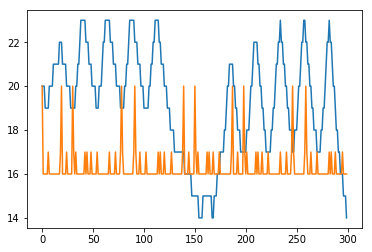

In [31]:
plt.figure()
plt.plot(y_train)
plt.plot(temp)
plt.show()

In [48]:
log_A = Model.log_A
log_pi = Model.log_pi
mu = Model.mu
sigma = Model.sigma

In [49]:
q = hmm.viterbi(log_pi, log_A, x_train, mu, sigma)

singular matrix
singular matrix
singular matrix
singular matrix


In [50]:
temp = np.zeros((300, 1))

for i in range(300):
        temp[i] = states[int(q[i])]

In [51]:
q

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

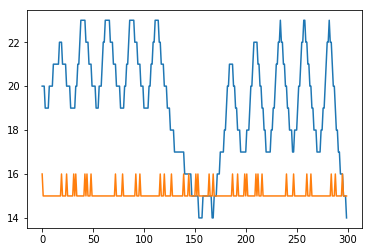

In [52]:
plt.figure()
plt.plot(y_train)
plt.plot(temp)
plt.show()

# Test HWK3

In [27]:
train = preprocess(np.loadtxt("/home/adrien/Projets/challenge/Challenge_ENS/data/EMGaussian.data"))
val = preprocess(np.loadtxt("/home/adrien/Projets/challenge/Challenge_ENS/data/EMGaussian.test"))

In [28]:
m_train = [[-0.912025  , -0.83566179],
       [-0.63176248,  0.86339506],
       [ 1.00802438,  0.77542387],
       [ 0.95968537, -0.89357379]]

s_train = [[[ 0.46427772,  0.36377471],
       [ 0.36377471,  0.30046566]],
       [[ 0.21604951,  0.01241976],
       [ 0.01241976,  0.13394853]],
       [[ 0.01564715,  0.01746074],
       [ 0.01746074,  0.59480994]],
       [[ 0.06852826,  0.00344969],
       [ 0.00344969,  0.09068673]]]

m_val = [[ 0.82069835, -1.13601842],
       [-0.88528868,  0.61698037],
       [-1.13506517, -1.05442645],
       [ 0.86322692,  0.6543525 ]]

s_val = [[[ 0.08225306,  0.00663817],
       [ 0.00663817,  0.05528044]],
       [[ 0.235517  ,  0.00371584],
       [ 0.00371584,  0.18241347]],
       [[ 0.50838722,  0.38689795],
       [ 0.38689795,  0.31667299]],
       [[ 0.01965098,  0.00358526],
       [ 0.00358526,  0.5665686 ]]]

mu_train = {i:np.array(m_train[i]).reshape((2, 1)) for i in range(4)}
sigma_train = {i:np.array(s_train[i]) for i in range(4)}

mu_val ={i:np.array(m_val[i]).reshape((2, 1)) for i in range(4)}
sigma_val = {i:np.array(s_val[i]) for i in range(4)}

In [30]:
pi = np.log([0.25]*4)
A = np.log(np.ones(4)/6 + np.identity(4)/3)

In [31]:
Model = hmm.HMM_EM(x_train, pi, A, mu, sigma)

In [32]:
Model.run()

it #0, E step
gamma min -2.814749767106558e+16 max -1.1368683772161603e-13
log_xi min -3.75430581192892e+16 max -5.145821546648222e-10
logp -18.99571803581599
it #0, M step
[ 1.7819504   1.58431805  1.59180602 -0.57236532 -0.85798644]
[1.90080067 1.76053787 1.64683076 1.37402269 0.69128809]
[1.6789363  1.58074256 1.56331596 0.53487515 0.42860077]
[1.59473965 1.65956308 1.47766049 0.47247003 1.91357629]
pi min -33.62952579262595 max -7.212719310700777e-11
A min -4.693082178351812 max -0.2391937470234593
it #1, E step
gamma min -3.774675289336856e+16 max -8.283058377855923e-06
log_xi min -5.239442500892698e+16 max -0.0006654237340626423
logp -3267.313078131003
it #1, M step
[1.203125 0.84375  1.265625     -inf     -inf]
[ 1.97047444  1.74807984  1.62736963  0.3559483  -0.22930946]
[ 1.66391455  1.53178113  1.57770441 -0.07955791 -0.2405276 ]
[1.54252839 1.46004396 1.38741561 0.52878158 2.03762874]
pi min -3.774675289336853e+16 max -0.004917934884815622
A min -134949403549411.11 max -0.20

/home/adrien/Projets/challenge/Challenge_ENS/hmm.py:206: RuntimeWarning: divide by zero encountered in log
  print(log_gamma_max + np.log(np.sum(np.exp(log_gamma[:, k] - log_gamma_max).reshape((-1, 1)).dot(np.ones((1, self.dim))) * self.u, axis=0)) - log_sum_gamma[k])
/home/adrien/Projets/challenge/Challenge_ENS/hmm.py:209: RuntimeWarning: divide by zero encountered in log
  np.ones((1, self.dim))) * self.u, axis=0)) - log_sum_gamma[k]
/home/adrien/Projets/challenge/Challenge_ENS/hmm.py:225: RuntimeWarning: divide by zero encountered in log
  log_sigma[k, :, :] = log_gamma_max + np.log(abs(cov)) - log_sum_gamma[k]


**predict - test**

# Other features

In [4]:
import features

In [5]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|██████████| 240/240 [00:11<00:00, 20.71it/s]


All the features have been loaded in 11.59 sec
19 useless features have been removed. There are now 31 features for each setting.


In [6]:
keys = all_features.keys()

In [13]:
train_building = np.random.choice(12, 9, replace=False) + 1

In [22]:
def random_drawing(features_dict, output_dict):
    """
    """
    
    train_buildings = np.random.choice(12, 9, replace=False) + 1
    
    X_train =  []
    Y_train = []
    X_test = []
    Y_test = []

    for i in tqdm(range(1, 13)):
        for j in range(20):
            
            name = 'building_{}_{}'.format(i, j)
            features = features_dict[name]
            output = output_dict[name]
        
            if i in train_buildings:
                
                if len(X_train) == 0:
                    X_train = features
                else:
                    X_train = np.vstack((X_train, features))
                
                if len(Y_train) == 0:
                    Y_train = output
                else:
                    Y_train = np.vstack((Y_train, output))
            
            else:
                
                if len(X_test) == 0:
                    X_test = features
                else:
                    X_test = np.vstack((X_test, features))
                
                if len(Y_test) == 0:
                    Y_test = output
                else:
                    Y_test = np.vstack((Y_test, output))
    
    return (X_train, Y_train), (X_test, Y_test)        

In [23]:
train, test = random_drawing(all_features, output)

In [24]:
train[0].shape

(1572480, 43)

In [7]:
train_buildings = ['building_10_8', 'building_11_12']
test_1 = 'building_11_16'
test_2 = 'building_6_16'

In [8]:
x_train = np.vstack((all_features['building_10_8'], np.array(all_features['building_11_12'])))
x_test_1 = np.array(all_features[test_1])
x_test_2 = np.array(all_features[test_2])

In [9]:
y_train = np.hstack((output['building_10_8'][:, 0].round(), output['building_11_12'][:, 0]))
y_test_1 = output[test_1][:, 0]
y_test_2 = output[test_2][:, 0]

In [10]:
x_train = preprocess(x_train)
x_test_1 = preprocess(x_test_1)
x_test_2 = preprocess(x_test_2)

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
neural_net = MLPRegressor(hidden_layer_sizes=(300, 100, 30), validation_fraction = 0.2, early_stopping = False, 
                          verbose = True, random_state = 777, learning_rate='constant', alpha = 10, max_iter = 500,
                          learning_rate_init=0.0001, tol=1e-6)

start = time.time()
neural_net.fit(x_train, y_train)
end = time.time()

print("Training time: " + str(end-start))

Iteration 1, loss = 239.18741289
Iteration 2, loss = 132.90389374
Iteration 3, loss = 24.73333707
Iteration 4, loss = 10.54843137
Iteration 5, loss = 9.53260722
Iteration 6, loss = 8.94834578
Iteration 7, loss = 8.54832405
Iteration 8, loss = 8.24095960
Iteration 9, loss = 7.98686585
Iteration 10, loss = 7.76217212
Iteration 11, loss = 7.55573998
Iteration 12, loss = 7.36238639
Iteration 13, loss = 7.17449101
Iteration 14, loss = 6.99807820
Iteration 15, loss = 6.82808349
Iteration 16, loss = 6.66666535
Iteration 17, loss = 6.50626043
Iteration 18, loss = 6.35477156
Iteration 19, loss = 6.20690750
Iteration 20, loss = 6.06456812
Iteration 21, loss = 5.92743307
Iteration 22, loss = 5.79303902
Iteration 23, loss = 5.66423125
Iteration 24, loss = 5.53875426
Iteration 25, loss = 5.41631018
Iteration 26, loss = 5.29579319
Iteration 27, loss = 5.17979985
Iteration 28, loss = 5.06630514
Iteration 29, loss = 4.95498297
Iteration 30, loss = 4.84459415
Iteration 31, loss = 4.74056600
Iteration 3

Iteration 253, loss = 0.96052260
Iteration 254, loss = 0.96068304
Iteration 255, loss = 0.96154120
Iteration 256, loss = 0.95758632
Iteration 257, loss = 0.95614655
Iteration 258, loss = 0.95738996
Iteration 259, loss = 0.95571135
Iteration 260, loss = 0.95469141
Iteration 261, loss = 0.95076261
Iteration 262, loss = 0.95368710
Iteration 263, loss = 0.95391301
Iteration 264, loss = 0.95225944
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Training time: 156.7984619140625


In [13]:
y_hat = neural_net.predict(x_test_1)

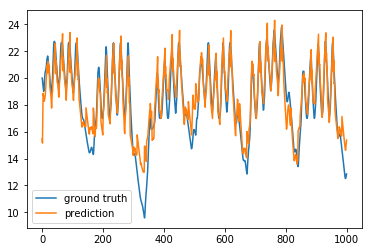

In [14]:
plt.figure()
plt.plot(y_test_1[0:1000], label='ground truth')
plt.plot(y_hat[0:1000], label='prediction')
plt.legend()
plt.show()

In [16]:
import sklearn

In [17]:
sklearn.metrics.mean_squared_error(y_hat, y_test_1)

0.8818483037254307

In [212]:
np.sum((y_hat - y_test_1)**2 ) / len(y_test_1)

0.8818483037254307

In [214]:
np.sum((y_hat - y_test_1)**2 / y_test_1**2) / len(y_test_1)

0.0026489520058152975

# comment retirer les mêmes variables sur le critère de la variance ?

In [209]:
Y = output[test_2][3360:3528, :]

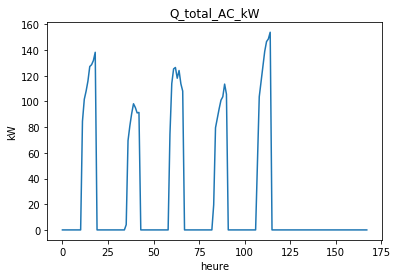

In [210]:
plt.figure()
plt.plot(Y[:, 2])
plt.xlabel('heure')
plt.ylabel('kW')
plt.title('Q_total_AC_kW')
plt.show()

In [10]:
def remove_low_var_variables(features, var_threshold):
    """
    """
    
    new_features = []
    L, N = features.shape
    
    for i in range(features.shape[1]):
        
        if(features[:, i].var() > var_threshold):
            
            new_features.append(list(features[:, i]))
    
    print('removed {} low-variance variables'.format(N - len(new_features)))
    return np.array(new_features).T

In [136]:
states = np.unique(np.hstack((y_train, y_test_1, y_test_2)))

In [137]:
states

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31.])

In [139]:
def init_for_hmm(x_train, y_train, states):
    """
    """
    
    K = len(states)
    L, N = x_train.shape
    
    temp_to_states = {t:i for i, t in enumerate(states)}
    
    A = np.zeros((K, K))
    pi = np.zeros((K, 1))
    mu = {i:np.zeros((N, 1)) for i in range(K)}
    sigma = {i:np.zeros((N, N)) for i in range(K)}
    
    clusters = [[] for k in range(K)]
    
    for i, t in enumerate(y_train):
        
        k = temp_to_states[t]
        feature = x_train[i, :].reshape((N, 1))
    
        clusters[k].append(i)
        mu[k] += feature
        
        if i < L-1:
            A[k, temp_to_states[y_train[i+1]]] += 1
            
    empty_clusters = [] 
    
    for k in range(K):
        
        cluster = clusters[k]
        cardinal = float(len(cluster))
        
        if cardinal == 0:   
            
            A[k, :] = np.ones(A[k, :].shape) / K
            empty_clusters.append(k)
            continue
        
        pi[k] = cardinal / float(L)
        
        A[k, :] = A[k, :] / np.sum(A[k, :])
        
        mu[k] = mu[k] / cardinal
        
        for i in cluster:
            
            v = x_train[i, :].reshape((N, 1)) - mu[k]
            sigma[k] += v.dot(v.T) / cardinal
            
    # in case of empty clusters:
    for k in empty_clusters:
        
        print("here")
        
        count = 0
        
        if k < K-1:
            mu[k] += mu[k+1]
            sigma[k] += sigma[k+1]
            count += 1
        
        if k > 0:
            mu[k] += mu[k-1]
            sigma[k] += sigma[k-1]
            count += 1
        
        mu[k] = mu[k] / count
        sigma[k] = sigma[k] / count
        
    return pi, A, mu, sigma    

In [140]:
pi, A, mu, sigma = init_for_hmm(x_train, y_train, states)

In [141]:
for k in range(len(states)):
    
    print(np.linalg.det(sigma[k]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0618085015756002e-177
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [122]:
y_train = np.hstack((output['building_10_8'][:, 0].round(), output['building_11_12'][:, 0].round()))

In [133]:
x_train.shape

(17472, 25)

In [18]:
a = [1, 2, 1]

In [19]:
np.savetxt('a', a)